## __Import Statements__

* Running all the import statements we might need in the course of completing the project 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import cross_val_predict
import os
import sys
import warnings
from statsmodels.tsa.arima.model import ARIMA
from __future__ import print_function
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


## __Data Understanding & Preparation__

* Load dataset using pandas
* Explore the dataset to understand the data
* Figure out if the dataset contains numerical or categorical data
* If needed remove or add features depending on the dataset and what problem are we solving
* Visualize the data and look for outliers
* Normalize the numerical features to bring them to a similar scale
* Split the dataset into training and testing



In [2]:

data_path = ['C:\\Users\\carlo\\Data Science Projects\\Data']
filepath = os.sep.join(data_path + ['Concrete_Data.xls'])
data = pd.read_excel(filepath, engine='xlrd')

In [3]:
data.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
data.dtypes.value_counts()

float64    8
int64      1
Name: count, dtype: int64

In [6]:
mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index([], dtype='object')

In [7]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
data.rename(columns={'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength(MPa, megapascals)'}, inplace=True)

In [9]:
target_variable = data['Concrete compressive strength(MPa, megapascals)']

print("Number of samples in normalize_features:", data.shape[0])
print("Number of samples in target_variable:", target_variable.shape[0])

Number of samples in normalize_features: 1030
Number of samples in target_variable: 1030


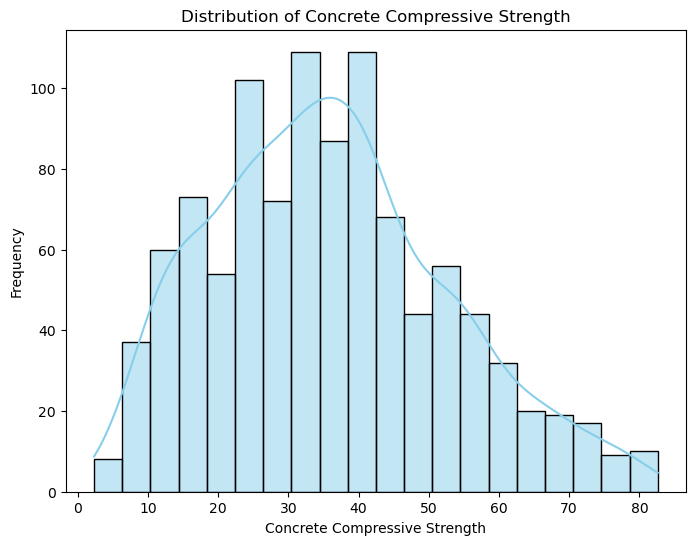

In [10]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=target_variable, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Concrete Compressive Strength')
plt.xlabel('Concrete Compressive Strength')
plt.ylabel('Frequency')
plt.show()

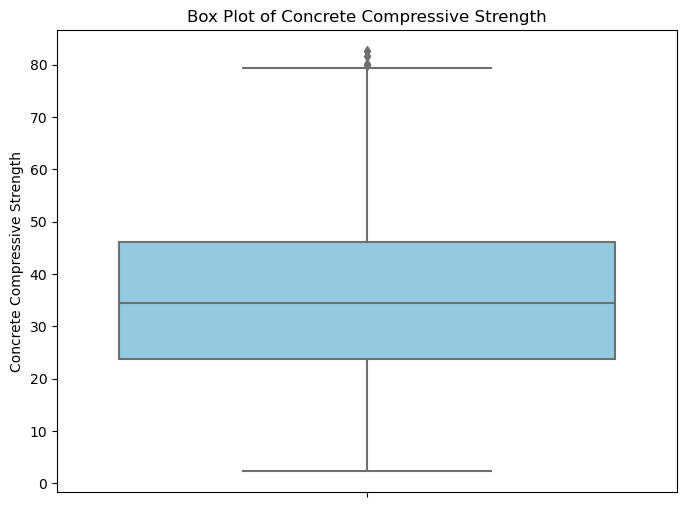

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y=target_variable, color='skyblue')
plt.title('Box Plot of Concrete Compressive Strength')
plt.ylabel('Concrete Compressive Strength')
plt.show()

In [12]:


Q1 = target_variable.quantile(0.25)
Q3 = target_variable.quantile(0.75)
IQR = Q3 - Q1

outliers = (target_variable < (Q1 - 1.5 * IQR)) | (target_variable > (Q3 + 1.5 * IQR))

data[outliers]


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.199848
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.599225
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.751169


In [13]:
outlier_indices = [153, 181, 381]
data = data.drop(outlier_indices)
target_variable = target_variable.drop(outlier_indices)

In [14]:
features = data.drop(columns=['Concrete compressive strength(MPa, megapascals)'])

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_variable, test_size=0.2, random_state=42)

## __Model Selection and Training__

* Select the two algorithms
* train each algorith using the normalized data

# Algorithm number 1: Linear regression

In [16]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_lr)

Mean Squared Error: 94.04681375346163
R-squared Score: 0.6208969117560432


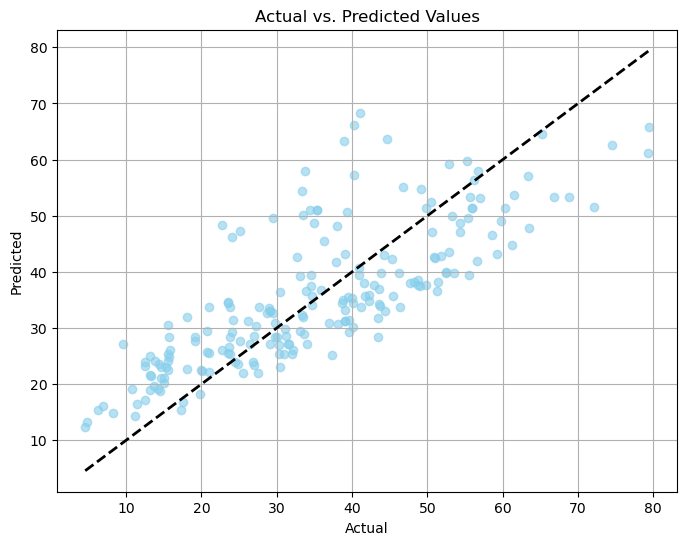

In [17]:
predictions = linear_reg_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='skyblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

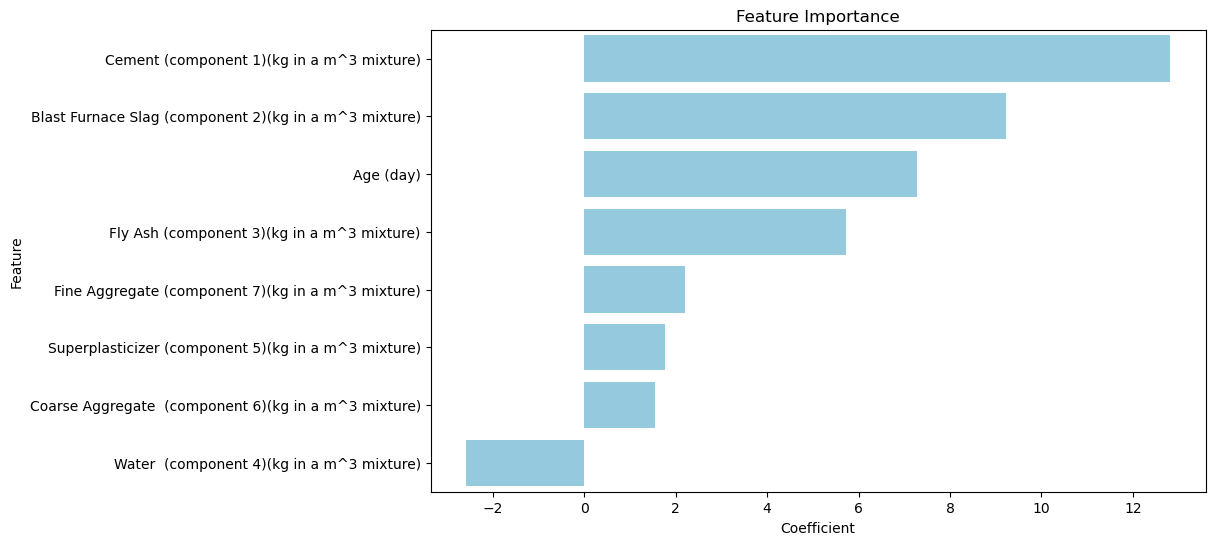

In [18]:
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': linear_reg_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [19]:

num_folds = 5  
cv_scores = cross_val_score(linear_reg_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

cv_scores_positive = -cv_scores
avg_cv_score_lr = np.mean(cv_scores_positive)

print("Cross-Validation Mean Squared Error:", avg_cv_score_lr)

Cross-Validation Mean Squared Error: 114.43512720511364


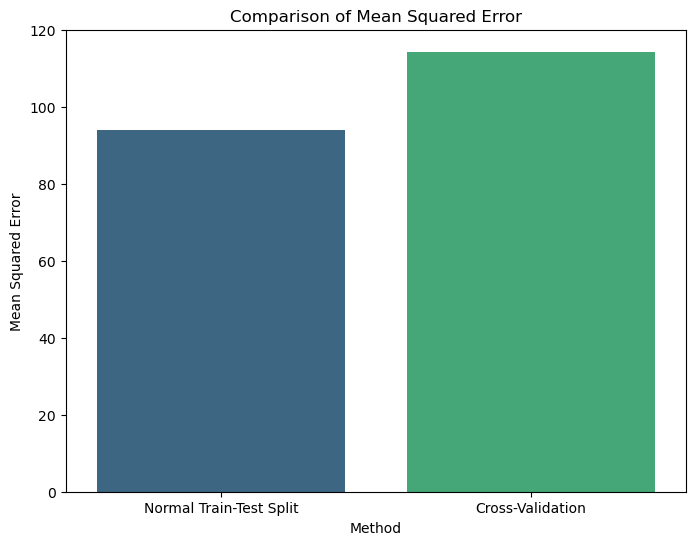

In [20]:
plt.figure(figsize=(8, 6))
methods = ['Normal Train-Test Split', 'Cross-Validation']
mse_values = [mse_lr, avg_cv_score_lr]
sns.barplot(x=methods, y=mse_values, palette='viridis')
plt.xlabel('Method')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()


# Algorithm number 2: Random Forest

In [21]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared Score:", r2_rf)

Random Forest Mean Squared Error: 19.559360908642823
Random Forest R-squared Score: 0.9211561367301325


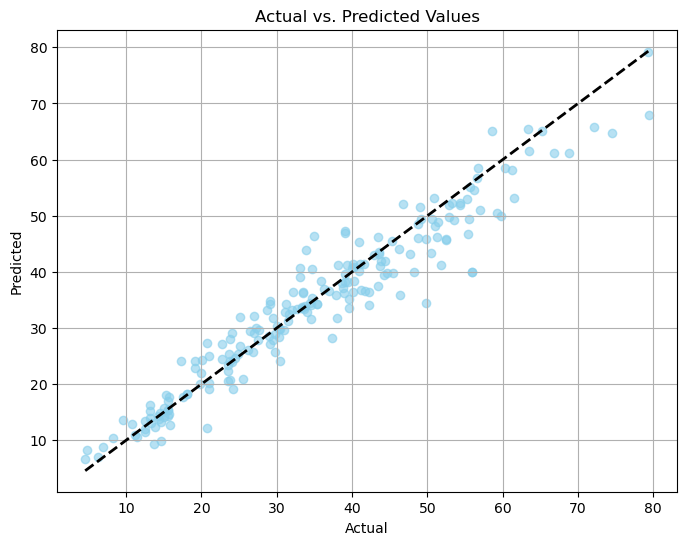

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='skyblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


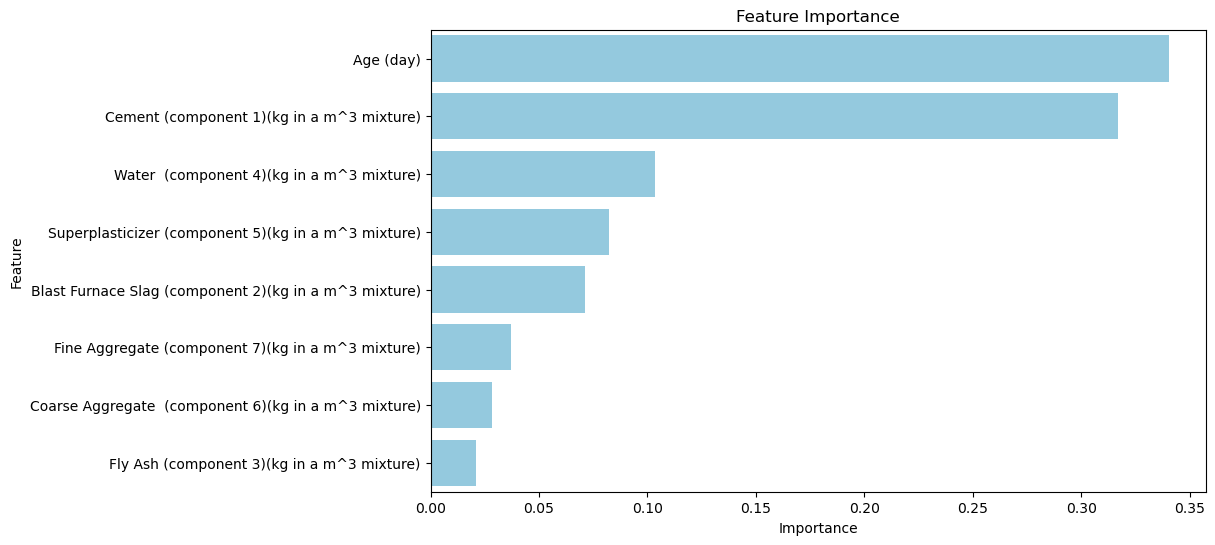

In [23]:
feature_importance = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Importance': random_forest_model.feature_importances_})
feature_importance['Feature'] = data.columns[:-1]  

feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_sorted, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [24]:
num_folds = 5  
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

cv_scores_positive = -cv_scores
avg_cv_score_rf = np.mean(cv_scores_positive)

print("Cross-Validation Mean Squared Error:", avg_cv_score_rf)



Cross-Validation Mean Squared Error: 27.41056996455053


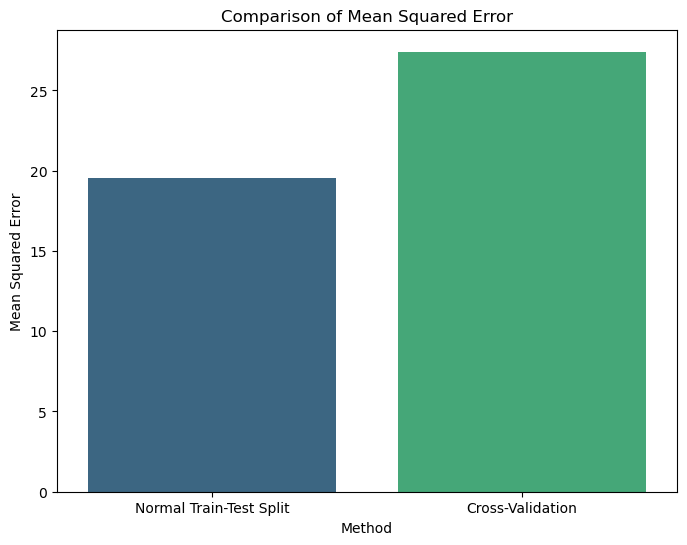

In [25]:
plt.figure(figsize=(8, 6))
methods = ['Normal Train-Test Split', 'Cross-Validation']
mse_values = [mse_rf, avg_cv_score_rf]
sns.barplot(x=methods, y=mse_values, palette='viridis')
plt.xlabel('Method')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()

# __Comparison of both algorithms (Linear Regression vs Random Forest)__

In [29]:
metrics = {
    'Linear Regression': {'MSE': mse_lr, 'R-squared': r2_lr, 'CV MSE': avg_cv_score_lr},
    'Random Forest': {'MSE': mse_rf, 'R-squared': r2_rf, 'CV MSE': avg_cv_score_rf}
}

metrics_df = pd.DataFrame(metrics)

metrics_df.head()


,Linear Regression,Random Forest
MSE,94.046814,19.559361
R-squared,0.620897,0.921156
CV MSE,114.435127,27.410570


<Figure size 1000x600 with 0 Axes>

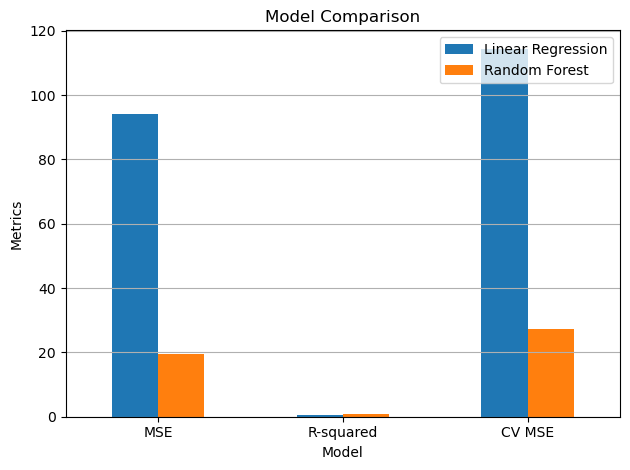

In [ ]:
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', rot=0)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## __Algorithms Improvement__
* Using the random search approach to try to improve the algorithms
* Using model stacking to combine both algorithms and get better predictions

In [28]:

param_dist_lr = {
    'fit_intercept': [True, False],
}

random_search_lr = RandomizedSearchCV(estimator=linear_reg_model, param_distributions=param_dist_lr, 
                                      n_iter=4, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search_lr.fit(X_train, y_train)

best_params_lr = random_search_lr.best_params_
print("Best Hyperparameters for Linear Regression:", best_params_lr)

best_model_lr = random_search_lr.best_estimator_

y_pred_best_lr = best_model_lr.predict(X_test)
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)
r2_best_lr = r2_score(y_test, y_pred_best_lr)
print("Best Mean Squared Error for Linear Regression:", mse_best_lr)
print("Best R-squared Score for Linear Regression:", r2_best_lr)


c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for Linear Regression: {'fit_intercept': True}
Best Mean Squared Error for Linear Regression: 94.04681375346163
Best R-squared Score for Linear Regression: 0.6208969117560432


In [30]:

param_dist_rf = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search_rf = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

best_model_rf = random_search_rf.best_estimator_

y_pred_best_rf = best_model_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print("Best Mean Squared Error for Random Forest:", mse_best_rf)
print("Best R-squared Score for Random Forest:", r2_best_rf)


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 136}
Best Mean Squared Error for Random Forest: 20.037474665400005
Best R-squared Score for Random Forest: 0.9192288582346195


In [32]:
results = pd.DataFrame(columns=['Model', 'MSE Before', 'R-squared Before', 'MSE After', 'R-squared After'])

results.loc[0] = ['Linear Regression', mse_lr, r2_lr, mse_best_lr, r2_best_lr]

results.loc[1] = ['Random Forest', mse_rf, r2_rf, mse_best_rf, r2_best_rf]

print(results)


               Model  MSE Before  R-squared Before  MSE After  R-squared After
0  Linear Regression   94.046814          0.620897  94.046814         0.620897
1      Random Forest   19.559361          0.921156  20.037475         0.919229


In [39]:
algorithm_1 = LinearRegression()
algorithm_2 = RandomForestRegressor()

algorithm_1.fit(X_train, y_train)
algorithm_2.fit(X_train, y_train)

predictions_algorithm_1 = cross_val_predict(algorithm_1, X_train, y_train, cv=5)
predictions_algorithm_2 = cross_val_predict(algorithm_2, X_train, y_train, cv=5)

stacked_features_train = np.column_stack((predictions_algorithm_1, predictions_algorithm_2))

stacked_algorithm = LinearRegression()
stacked_algorithm.fit(stacked_features_train, y_train)

predictions_algorithm_1_test = algorithm_1.predict(X_test)
predictions_algorithm_2_test = algorithm_2.predict(X_test)

stacked_features_test = np.column_stack((predictions_algorithm_1_test, predictions_algorithm_2_test))

stacked_predictions = stacked_algorithm.predict(stacked_features_test)


In [40]:
mse_stacked = mean_squared_error(y_test, stacked_predictions)
r2_stacked = r2_score(y_test, stacked_predictions)
print("\nStacked Algorithm Performance:")
print("Mean Squared Error:", mse_stacked)
print("R-squared Score:", r2_stacked)


Stacked Algorithm Performance:
Mean Squared Error: 18.129137379831985
R-squared Score: 0.926921373584118


In [45]:

results = {
    "Algorithm": ["Linear Regression", "Random Forest", "Stacked Algorithm"],
    "Train/Test Split (MSE)": [mse_lr, mse_rf, mse_stacked],
    "Train/Test Split (R2)": [r2_lr, r2_rf, r2_stacked],
    "Cross-Validation (MSE)": [avg_cv_score_lr, avg_cv_score_rf, None],
    "Random Search (MSE)": [mse_best_lr, mse_best_rf, None]
}

results_df = pd.DataFrame(results)

results_df.head().T


,0,1,2
Algorithm,Linear Regression,Random Forest,Stacked Algorithm
Train/Test Split (MSE),94.046814,19.559361,18.129137
Train/Test Split (R2),0.620897,0.921156,0.926921
Cross-Validation (MSE),114.435127,27.41057,NaN
Random Search (MSE),94.046814,20.037475,NaN
